In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [ ]:
df = pd.read_csv("yield_df.csv.zip")

In [ ]:
df

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,28242.0,14120.500000,8152.907488,0.00,7060.2500,14120.50,21180.75,28241.00
Year,28242.0,2001.544296,7.051905,1990.00,1995.0000,2001.00,2008.00,2013.00
hg/ha_yield,28242.0,77053.332094,84956.612897,50.00,19919.2500,38295.00,104676.75,501412.00
average_rain_fall_mm_per_year,28242.0,1149.055980,709.812150,51.00,593.0000,1083.00,1668.00,3240.00
pesticides_tonnes,28242.0,37076.909344,59958.784665,0.04,1702.0000,17529.44,48687.88,367778.00
avg_temp,28242.0,20.542627,6.312051,1.30,16.7025,21.51,26.00,30.65


In [ ]:
df.drop("Unnamed: 0", axis=1,inplace=True)
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [ ]:
#getting rid of data from countries that have fewer than 100 data points
country_counts =df['Area'].value_counts()
countries_to_drop = country_counts[country_counts < 100].index.tolist()
df_filtered = df[~df['Area'].isin(countries_to_drop)]
df = df_filtered.reset_index(drop=True)
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Algeria,Maize,1990,16500,89.0,1828.92,17.48
1,Algeria,Potatoes,1990,78936,89.0,1828.92,17.48
2,Algeria,"Rice, paddy",1990,28000,89.0,1828.92,17.48
3,Algeria,Sorghum,1990,16571,89.0,1828.92,17.48
4,Algeria,Wheat,1990,6315,89.0,1828.92,17.48
...,...,...,...,...,...,...,...
26292,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
26293,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
26294,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
26295,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


{'Algeria': 0, 'Angola': 1, 'Argentina': 2, 'Australia': 3, 'Azerbaijan': 4, 'Bangladesh': 5, 'Brazil': 6, 'Bulgaria': 7, 'Burkina Faso': 8, 'Burundi': 9, 'Cameroon': 10, 'Canada': 11, 'Central African Republic': 12, 'Chile': 13, 'Colombia': 14, 'Croatia': 15, 'Dominican Republic': 16, 'Ecuador': 17, 'Egypt': 18, 'El Salvador': 19, 'France': 20, 'Germany': 21, 'Ghana': 22, 'Greece': 23, 'Guatemala': 24, 'Guinea': 25, 'Guyana': 26, 'Haiti': 27, 'Honduras': 28, 'Hungary': 29, 'India': 30, 'Indonesia': 31, 'Iraq': 32, 'Italy': 33, 'Jamaica': 34, 'Japan': 35, 'Kazakhstan': 36, 'Kenya': 37, 'Libya': 38, 'Madagascar': 39, 'Malawi': 40, 'Mali': 41, 'Mauritania': 42, 'Mauritius': 43, 'Mexico': 44, 'Morocco': 45, 'Mozambique': 46, 'Nepal': 47, 'Nicaragua': 48, 'Niger': 49, 'Pakistan': 50, 'Papua New Guinea': 51, 'Peru': 52, 'Portugal': 53, 'Romania': 54, 'Rwanda': 55, 'Saudi Arabia': 56, 'Senegal': 57, 'South Africa': 58, 'Spain': 59, 'Sri Lanka': 60, 'Suriname': 61, 'Tajikistan': 62, 'Thailand

<Axes: >

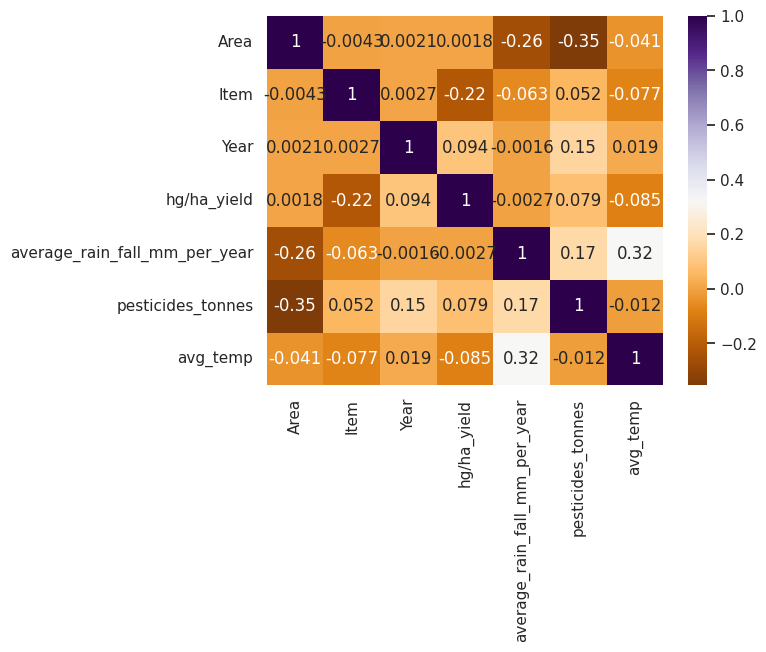

In [ ]:
datacorr=df.copy()
from sklearn.preprocessing import LabelEncoder
categorical_columns = datacorr.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    datacorr[column] = label_encoder.fit_transform(datacorr[column])
    print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
sns.heatmap(datacorr.corr() , annot= True , cmap='PuOr')


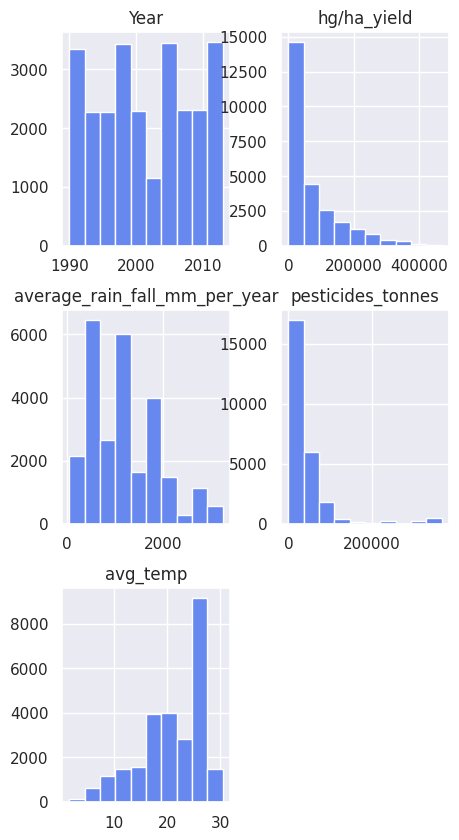

In [ ]:
sns.set(palette='coolwarm')
df.hist(figsize=(5,10));

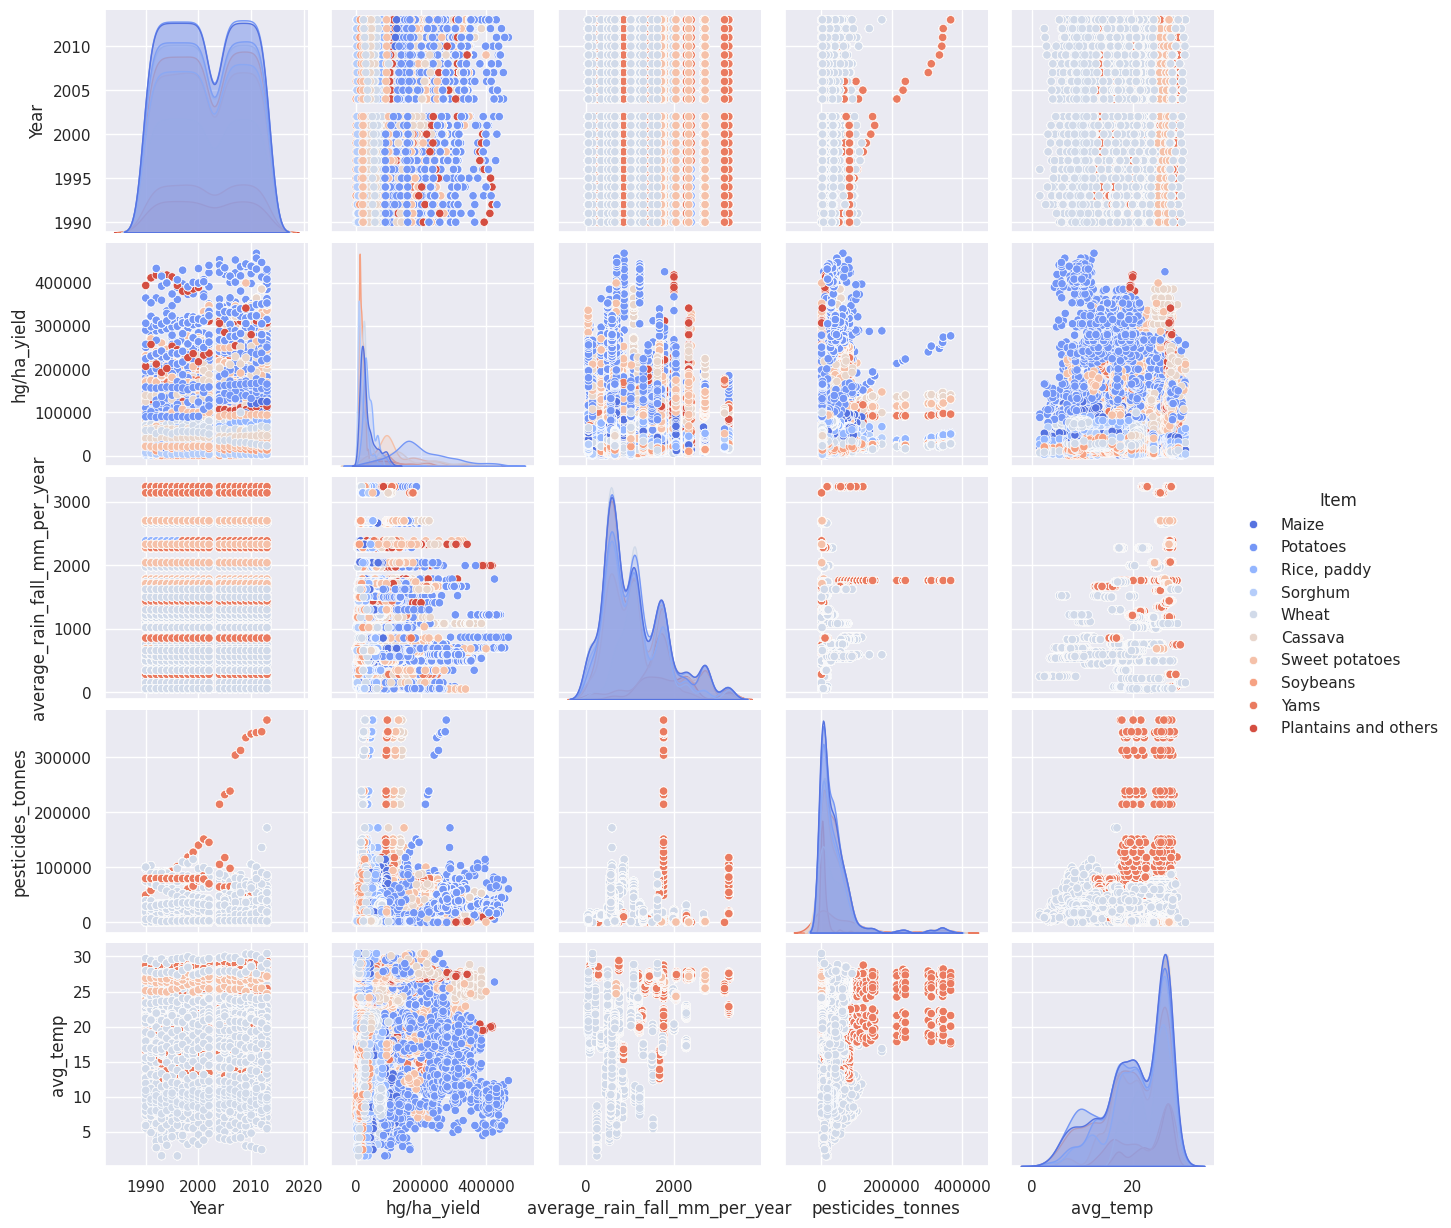

In [ ]:
sns.pairplot(data=df,hue='Item',kind='scatter',palette='coolwarm')

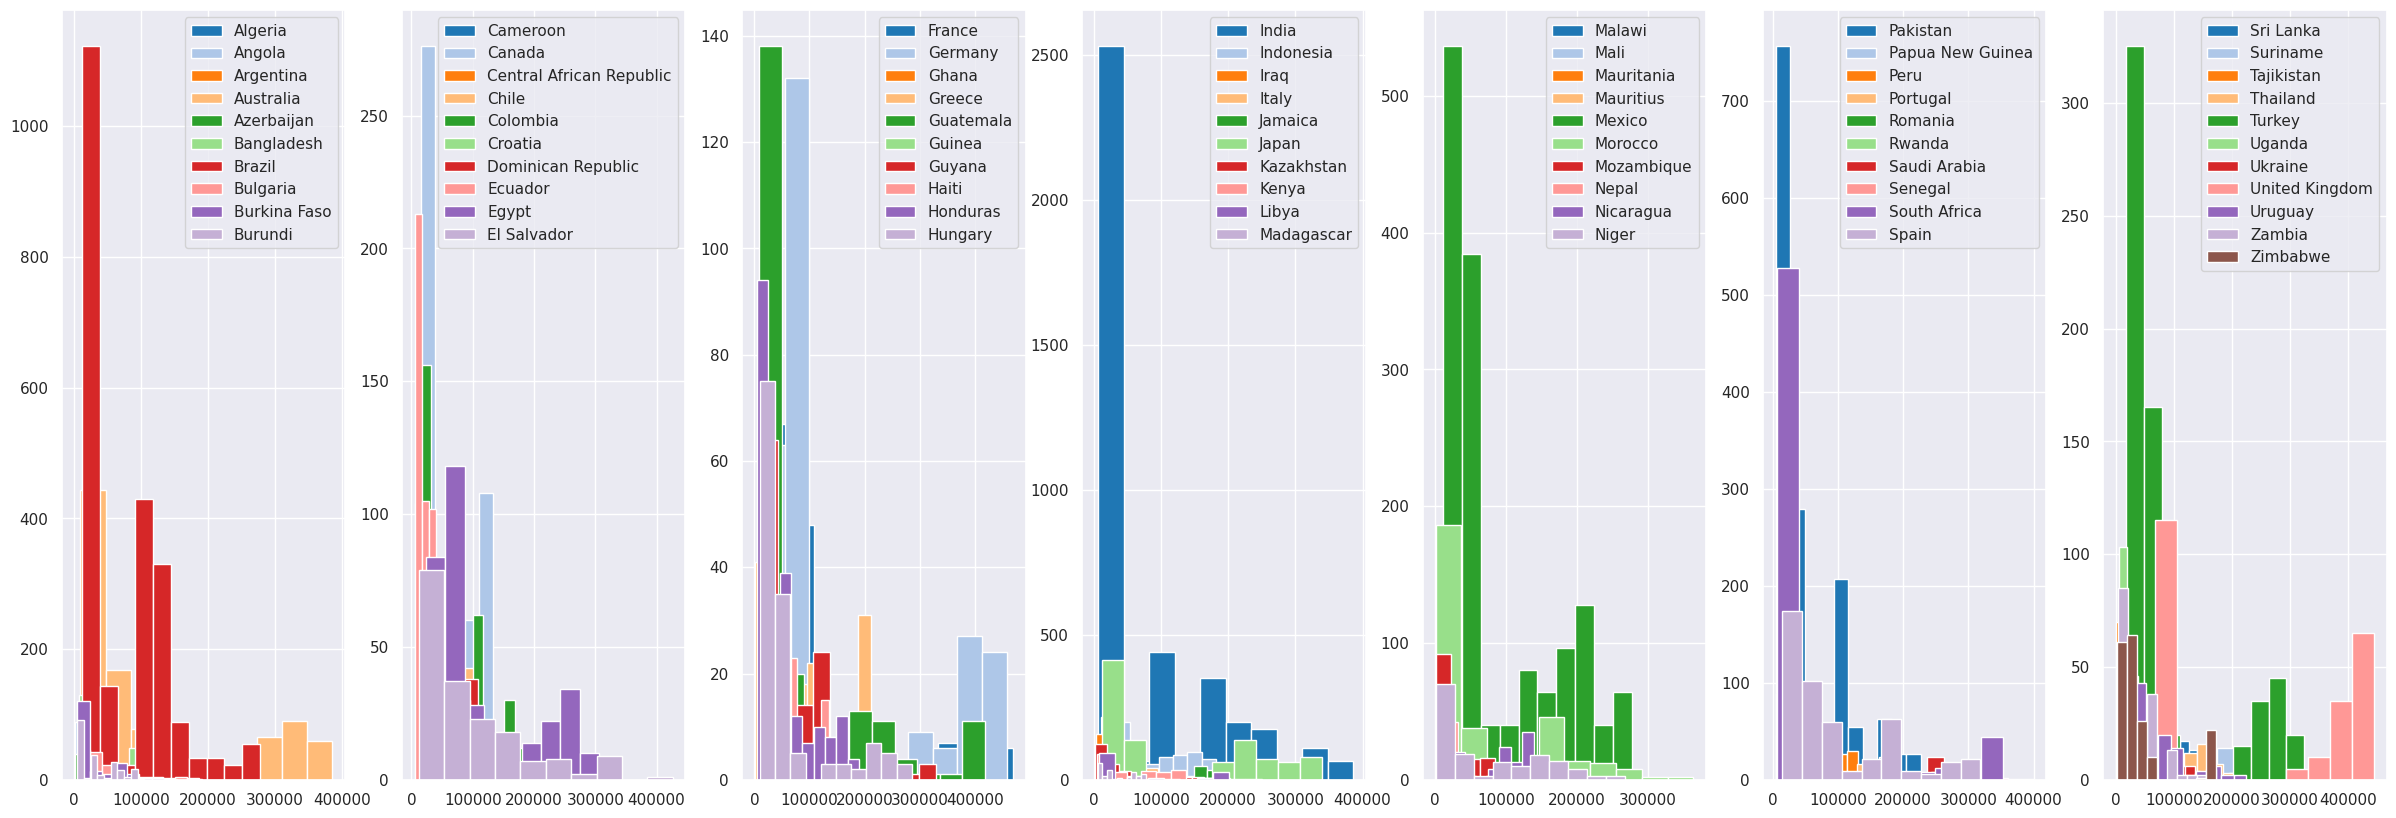

In [ ]:
palette = sns.color_palette('tab20', 21,as_cmap=True)
num_plots = 7
areas_per_plot = 10

# Get unique areas
unique_areas = sorted(df['Area'].unique())

# Split into chunks
area_chunks = [unique_areas[i:i+areas_per_plot] for i in range(0, len(unique_areas), areas_per_plot)]
area_chunks[-2] = unique_areas[-11:]
fig, axs = plt.subplots(ncols=num_plots, figsize=(30, 10))
j=0
for i, ax in enumerate(axs):

    plot_df = df[df['Area'].isin(area_chunks[i])]
    for i, area in enumerate(plot_df['Area'].unique()):
       data = plot_df[plot_df['Area'] == area]
       ax.hist(data['hg/ha_yield'], facecolor=palette(i), label=area)

    ax.legend()
    j+=1

plt.show()

<ipython-input-12-5dd8e6c9b2e2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x = df.Item, y = df['pesticides_tonnes'],palette='BrBG')


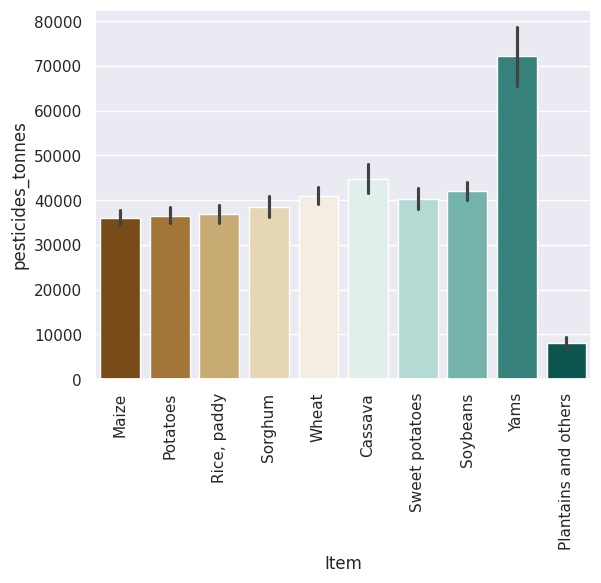

In [ ]:
sns.barplot(data=df, x = df.Item, y = df['pesticides_tonnes'],palette='BrBG')
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [ ]:
X, y = datacorr.drop(labels='hg/ha_yield', axis=1), datacorr['hg/ha_yield']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


The accuracy of the Linear Regression Model Train is 7.39
The accuracy of the  Linear Regression Model Test is 7.37


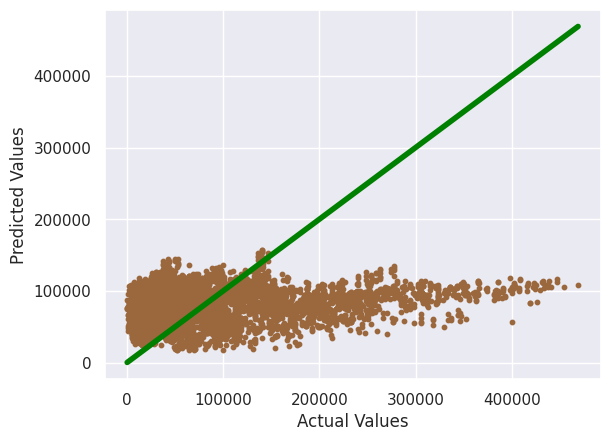

The accuracy of the Random Forest Model Train is 99.80
The accuracy of the  Random Forest Model Test is 98.56


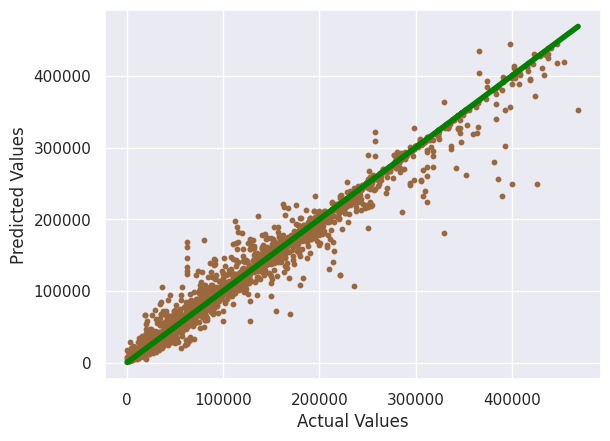

The accuracy of the Gradient Boost Model Train is 84.47
The accuracy of the  Gradient Boost Model Test is 83.11


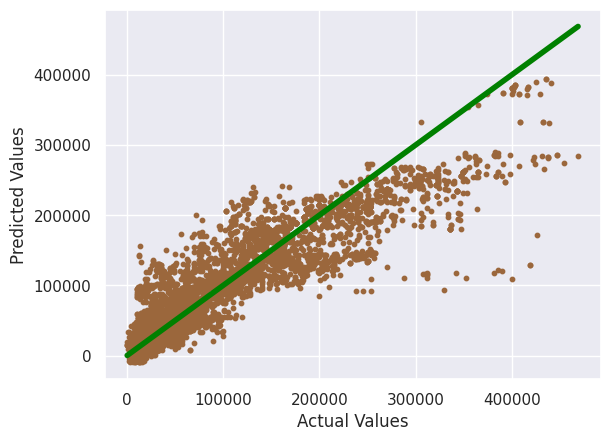

The accuracy of the XGBoost Model Train is 98.82
The accuracy of the  XGBoost Model Test is 97.43


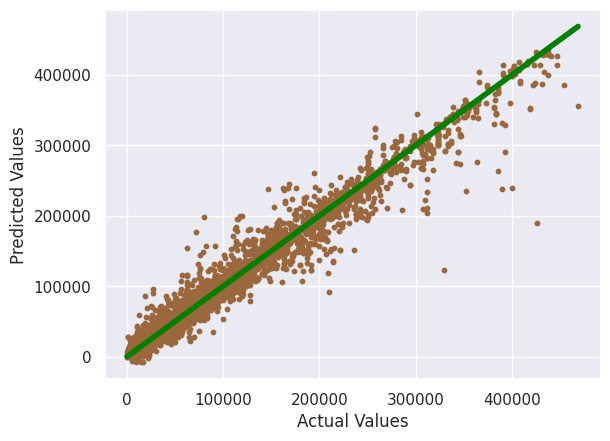

The accuracy of the KNN Model Train is 56.72
The accuracy of the  KNN Model Test is 28.82


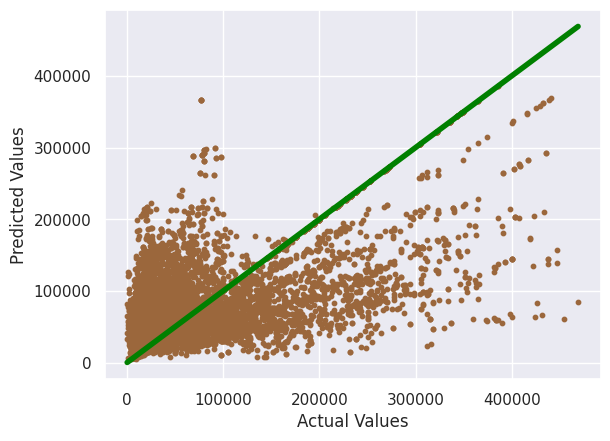

The accuracy of the Decision Tree Model Train is 100.00
The accuracy of the  Decision Tree Model Test is 97.62


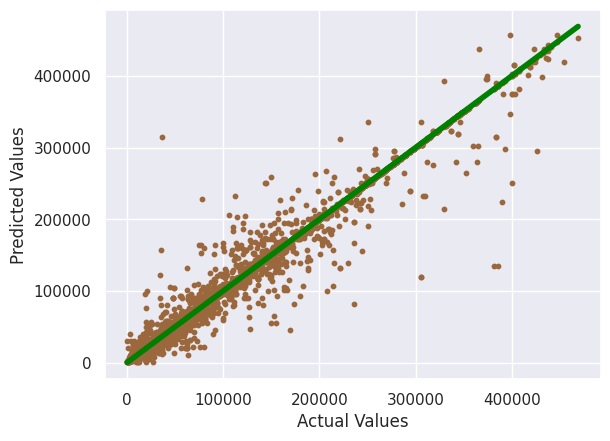

The accuracy of the Bagging Regressor Model Train is 99.81
The accuracy of the  Bagging Regressor Model Test is 98.59


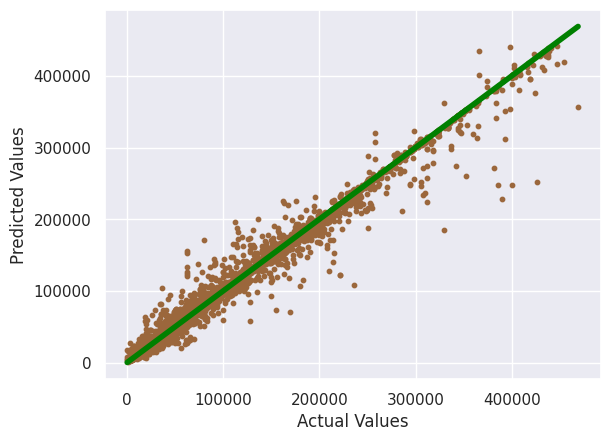

,Model,Accuracy,MSE,R2_score
0,Linear Regression,0.073724,6293718529.871188,0.073724
1,Random Forest,0.985628,97654323.573225,0.985628
2,Gradient Boost,0.831140,1147345777.258148,0.831140
3,XGBoost,0.974317,174504250.320092,0.974317
4,KNN,0.288206,4836388296.236208,0.288206
5,Decision Tree,0.976174,161890347.543726,0.976174
6,Bagging Regressor,0.985881,95933983.565644,0.985881


In [ ]:
results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('KNN',KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree',DecisionTreeRegressor(random_state=42)),
    ('Bagging Regressor',BaggingRegressor(n_estimators=150, random_state=42))
          ]

import pickle
for name, model in models:
    model.fit(X_train, y_train)
    if name == 'Bagging Regressor':
        with open('BaggingRegressor.pkl','wb') as f:
            pickle.dump(model,f)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score))
    acc = (model.score(X_train , y_train)*100)
    print(f'The accuracy of the {name} Model Train is {acc:.2f}')
    acc =(model.score(X_test , y_test)*100)
    print(f'The accuracy of the  {name} Model Test is {acc:.2f}')
    plt.scatter(y_test, y_pred,s=10,color='#9B673C')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
    plt.show()

dff = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])
df_styled = dff.style.highlight_max(subset=['Accuracy','R2_score'], color='green').highlight_min(subset=['MSE'], color='green').highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')





display(df_styled)

In [ ]:
with open('X_test.pkl','wb') as f:
    pickle.dump(X_test,f)

with open('y_test.pkl','wb') as f:
    pickle.dump(y_test,f)

In [ ]:
loaded = None
load_X_test = None
load_y_test = None
with open('BaggingRegressor.pkl', 'rb') as f:
    loaded = pickle.load(f)
with open('X_test.pkl', 'rb') as f:
    load_X_test = pickle.load(f)
with open('y_test.pkl', 'rb') as f:
    load_y_test = pickle.load(f)

import random
for i in range(10):
    ind = random.randint(0,len(load_X_test))
    print(load_X_test[ind:ind+1])
    y_pred = loaded.predict(load_X_test[ind:ind+1])
    print("Prediction:")
    print(y_pred)
    print("Actual:")
    print(load_y_test[ind:ind+1],"\n\n\n")

       Area  Item  Year  average_rain_fall_mm_per_year  pesticides_tonnes  \
18882    44     7  2007                          758.0           64501.28   

       avg_temp  
18882     21.35  
Prediction:
[205406.44666667]
Actual:
18882    204599
Name: hg/ha_yield, dtype: int64 



       Area  Item  Year  average_rain_fall_mm_per_year  pesticides_tonnes  \
13033    30     5  2009                         1083.0           28707.01   

       avg_temp  
13033     27.14  
Prediction:
[9621.]
Actual:
13033    9621
Name: hg/ha_yield, dtype: int64 



      Area  Item  Year  average_rain_fall_mm_per_year  pesticides_tonnes  \
6891    17     1  1990                         2274.0             2537.0   

      avg_temp  
6891     21.82  
Prediction:
[11114.25333333]
Actual:
6891    10602
Name: hg/ha_yield, dtype: int64 



       Area  Item  Year  average_rain_fall_mm_per_year  pesticides_tonnes  \
19575    45     1  2012                          346.0            13697.0   

       avg_temp  
195

In [ ]:
print(sum(y_test)/len(y_test))
print(95933983.565644**(1/2)/(sum(y_test)/len(y_test)))

75432.09112801014
0.1298464533892032


In [ ]:
print(loaded.predict([[44, 6, 1994, 758.0, 34468.93, 16.42]]))

[18350.20666667]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(
